# Introducción a Bases de Datos - Sloan Digital Sky Survey & SciServer
_A python exercise notebook written by Rita Tojeiro, October 2017. 
This notebook has benefited from examples provided by Britt Lundgren (University of North Carolina) and Jordan Raddick (John Hopkins University), and resource lists by Rick Muller (Sandia National Laboratories)._

En esta guía aprenderemos a explorar uan de las bases de datos astronómicos más grande, y veremos algunas propiedades de galaxias, la estructura en gran escala del Universo y datos espectrales.

## Explorando SDSS

Sloan Digital Sky Survey (**SDSS**, www.sdss.org) es el relevamiento astronómico más grande existente hasta ahora, y contiene información tanto fotométrica como espectroscópica de millones de galaxias, estrellas y quasars. 

Comencemos explorando la base de datos en el navegador web.

But first, we will begin with a more straightforward exploration. 
The [SDSS Skyserver](http://skyserver.sdss.org/public/en/tools/chart/navi.aspx) provides a simple interface for exploring the images and spectra of objects in the SDSS.  

In order to get a quick feel for the spectroscopic properties of stars, galaxies and quasars, take some time to navigate the Skyserver, starting at the following location:

RA = 178.91,  Dec = 35.0

Try selecting only objects with spectra, and use the EXPLORE feature to explore the images and spectra of the wide variety of objects in the field.  You can add objects that you find interesting to a temporary notebook by clicking "add to notes". You can view your notebook by clicking "show notes". It's OK to take your time - this is your chance to explore. 


### Exercise

Consider the following:

- How do the images of stars, galaxies, and quasars compare?
- How do the spectra of stars, galaxies, and quasars compare?


Answer here:

### Exercise:
Find a **galaxy** that you like, and write down the plate, fiber, MJD (find them on the bottom right of the EXPLORE window) and the SDSS objid (on the  top right of the same window). 

We will now use python libraries to fetch data on that galaxy directly onto your work space, and that you can maniputale immediately in this workbook.

In [12]:
#answer here:
mjd = 51930
fiber = 183
plate = 285
objid = 320931808487172096

We will first **import** a bunch of libraries and arrange some settings.

In [13]:
# Import libraries for use in this notebook.
import numpy as np                  # standard Python lib for math ops
import pandas                       # data manipulation package
import matplotlib.pyplot as plt     # another graphing package
import astroML                      # an astronomy machine learning and data analysis library that we will use to quickly grab some data
from astroML.datasets import fetch_sdss_spectrum, fetch_sdss_filter, fetch_sdss_galaxy_colors
print('Supporting libraries imported')

# Apply some special settings to the imported libraries
# ensure columns get written completely in notebook
pandas.set_option('display.max_colwidth', -1)
# do *not* show python warnings 
import warnings
warnings.filterwarnings('ignore')
print('Settings applied')

Supporting libraries imported
Settings applied


Now we will use a function to fetch the spectrum of your selected galaxy, and plot it. It will be saved in an object called **spec**. **spec** has a number of attributes and functions, most of which we are not interested in right now. The next cell also extracts the wavelength and flux into sensibly named arrays.

In [14]:
# See http://www.astroml.org/user_guide/datasets.html#sdss-data for more information
spec = fetch_sdss_spectrum(plate=plate,fiber=fiber,mjd=mjd)
wavelength = spec.wavelength()
flux = spec.spectrum


caching to /home/idies/astroML_data/SDSSspec/0285/spSpec-51930-0285-183.fit


### Exercise:

1. What is length of the wavelength array? And of the flux array?
2. Use plt.plot() to make a plot of your spectrum. Remember to add labels to the axis, and a title. Does it match the spectrum in the EXPLORE window?


(3865,) (3865,)


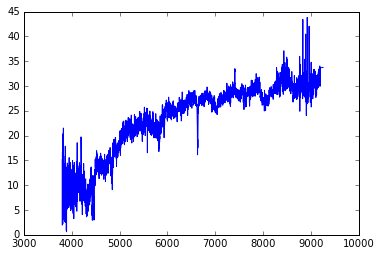

In [28]:
#answer here
print(np.shape(wavelength), np.shape(flux))
plt.plot(wavelength,flux)

## Determining the redshifts of objects

Prominent spectral emission and absorption lines can be used to determine the redshift of the object.  Below are some links to commonly observed transitions in galaxies and quasars.  

- http://classic.sdss.org/dr7/algorithms/linestable.html

The wavelengths of the provided lines are given in Angstroms and measured in the rest (laboratory) frame.  The spectra you are examining may be distant quasars or galaxies.  If so, the lines will appear redshifted, according to the relation:

$\lambda_{observed} = \lambda_{rest}\times(1+z)$

where $z$ is the redshift of the object.


### Exercise:

You will measure the redshift of your galaxy by comparing the rest-frame wavelenth of the H&K lines to the observed ones. Use the spectrum plot from the EXPLORE window to identify the spectral region of interest.

Replot yout spectrum, using plt.xlim() and plt.ylim() to zoom in around the H&K absorption lines. [warning, the H&K absorption feature will be less prominent in blue galaxies. Why? If your galaxy has very weak H&K lines, feel free to try another one).

Use plt.scatter() to mark the position of the observed lines, assuming z = 0 (i.e., rest-frame wavelength). 

By changing the redshift find, by eye, a sensible value for the redshift of the galaxy (remember, both lines need to be redshifted by the _same_ amount). Does your estimate match the redshift given in the EXPLORE window?


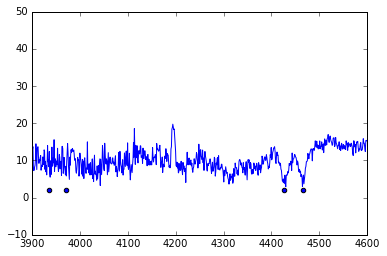

In [36]:
#answer here:
plt.xlim(3900,4600)
plt.plot(wavelength,flux)
plt.scatter(3934.777,2)
plt.scatter(3969.588,2)
plt.scatter(3969.588*(1.+0.125),2)
plt.scatter(3934.777*(1.+0.125),2)

## Broadband photometry and galaxy colours

The SDSS photometric camera imaged the sky using 5 different filters. The images that you saw on the SkyServer Navigate Tool are the combination of these images, creating a colour image. 

The 5 photometric bands are named with letters, and from the blue to the red they are: **u, g, r, i and z**. Each filter allows light of certain wavelengths to hit the detector, and blocks all other wavelengths. Their response is characterised by the so called _transmission curves_. 

The cell below fetches the transmission curves of the 5 filters, and the cell after that plots them overlaid with the spectrum of the galaxy you chose in the above exercise.

In [37]:
# Load filter files using fetch_sdss_filter()
u_data = fetch_sdss_filter('u') 
u_wave = u_data[0]
u_tp = u_data[1]

g_data = fetch_sdss_filter('g') 
g_wave = g_data[0]
g_tp = g_data[2]

r_data = fetch_sdss_filter('r')   
r_wave = r_data[0]
r_tp = r_data[1]

i_data = fetch_sdss_filter('i') 
i_wave = i_data[0]
i_tp = i_data[1]

z_data = fetch_sdss_filter('z') 
z_wave = z_data[0]
z_tp = z_data[1]

downloading from http://www.sdss.org/dr7/instruments/imager/filters/u.dat
downloading from http://www.sdss.org/dr7/instruments/imager/filters/g.dat
downloading from http://www.sdss.org/dr7/instruments/imager/filters/r.dat
downloading from http://www.sdss.org/dr7/instruments/imager/filters/i.dat
downloading from http://www.sdss.org/dr7/instruments/imager/filters/z.dat


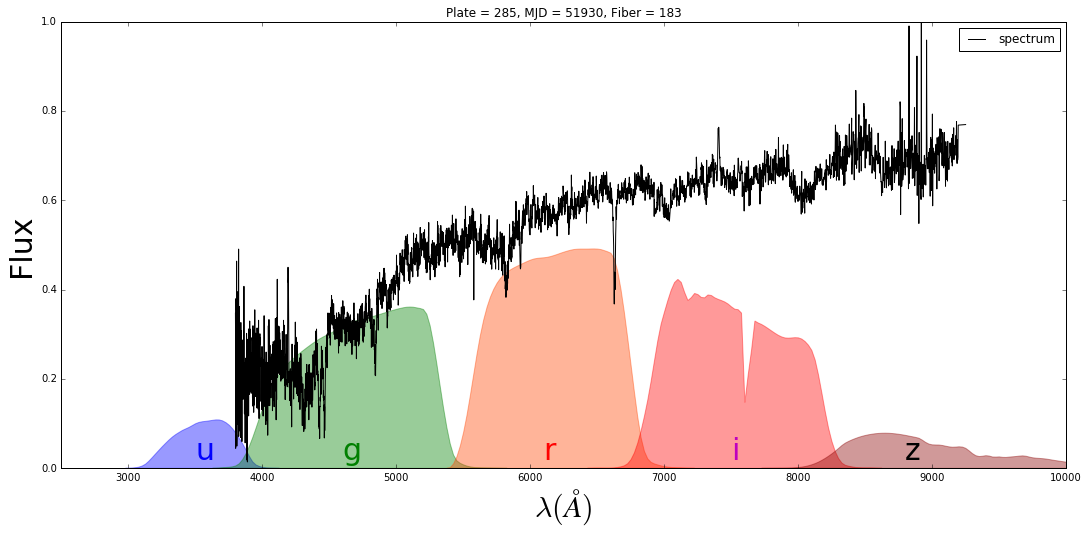

In [38]:
#plot filter curves overlaid on spectrum.
plt.figure(figsize=(18,8))
plt.plot(wavelength, flux/flux.max(), label='spectrum', color='black')

plt.legend()
plt.title('Plate = {0:.0f}, MJD = {1:.0f}, Fiber = {2:.0f}'.format(locals()['plate'],locals()['mjd'],locals()['fiber']))

plt.xlabel(r'$\lambda (\AA)$', fontsize=30)
plt.ylabel('Flux', fontsize=30)
plt.xlim(2500,10000)

plt.fill(u_wave, u_tp, color='blue', alpha=0.4)
plt.fill(g_wave, g_tp, color='green', alpha=0.4)
plt.fill(r_wave, r_tp, color='orangered', alpha=0.4)
plt.fill(i_wave, i_tp, color='red', alpha=0.4)
plt.fill(z_wave, z_tp, color='darkred', alpha=0.4)

for f, c, loc in zip('ugriz', 'bgrmk', [3500, 4600, 6100, 7500, 8800]):
    plt.text(loc, 0.02, f, color=c, fontsize=30)

The width of the filter shows you the range of wavelengths captured by each filter, and the amplitude shows you how much light is allowed through. The overall normalisation is irrelevant here, but notice for example how much more efficient the _r_ filter is, compared to the _u_ or _z_ bands. Notice also how we can probe wavelenths bluewards and redwards of the limits of the SDSS spectrograph.

Although spectra offer much more detailed information (i.e. redshifts!), flux coming through from the photometric bands can tells us an awful lot about a galaxy. _The integrated flux in each band is most often translated into an apparent magnitude._ We refer to the difference between bands, say 'g-r' or 'u-g', as a **colour**. 


### Exercise
Go back to SDSS Navigate Tool, and choose two galaxies. A red and a blue one, preferentially around the same redshift. Use the tools we used above to fetch their spectra, and plot them alongside the photometric filter transmission curves. 

In [14]:
#answer here:


In [19]:
#answer here:

### Exercise: 
Which of the two galaxies has a higher value of g-r? Why? How do you expect that to change if the galaxy was at a larger redshift?

Answer here:

### Exercise:

Take the following galaxy, which has a redshift = 0.07
- mjd = 53469
- fiber = 368
- plate = 2099

Once again, plot the observed spectrum overlaid with the broadband filter transmission curves. Overplot the same spectrum, but imagining the galaxy was instead at redshifts 0.1, 0.3, 0.5. Might colours alone (without spectra), be able to tell you something about the redshift of a galaxy?


In [20]:
#answer here:


Answer here:

**Congratulations, that is the end of the Lab!** Make sure you've **run all the code cells, filled in all the text answers and that your plots are all showing without error**. **Print** out the notebook, and **attach it to your lab book**. Now that you know the basics, next week we will explore the local structure of the Universe and how galaxy properties relate to it.